In [7]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid", color_codes=True)
sns.set(font_scale=1.35, style="ticks") #set styling preferences
import statsmodels.api as sm
from scipy import stats
import math
from math import pi
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans2,vq, whiten

In [3]:
# Show all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
%%time
stacked_tr_fr_path = "https://beam-core-act.s3.amazonaws.com/deepDive/CleanData/SanFrancisco/Stacked/"
sf_stacked_tr_fr = pd.read_csv(stacked_tr_fr_path + 'sf_2018_stacked_tr_fr_v4.csv')

<timed exec>:2: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 3min 10s
Wall time: 8min 28s


In [3]:
sf_stacked_tr_fr.head(2000).to_csv('C:/Shared-Work/Data/CleanData/ASIM_BEAM_Merged/INEXUS_TEST.csv', index = False)

In [8]:
sf_stacked_tr_fr.head()

,IDMerged,tripIndex,lever,lever_position,logsum_trip_Potential_INEXUS,Realized_INEXUS,Social_INEXUS,Potential_INEXUS_in_dollar,Realized_INEXUS_in_dollar,logsum_relative_to_baseline,door_to_door_time_relative_to_baseline,income,actPurpose,mode_choice_actual_6,mode_choice_actual_BEAM,mandatoryCat,actEndTime,actEndType,actStartTime,actStartType,cost_BEAM,distance_bike,distance_mode_choice,distance_privateCar,distance_ridehail,distance_transit,distance_travelling,distance_walking,duration_in_privateCar,duration_in_ridehail,duration_in_transit,duration_on_bike,duration_travelling,duration_walking,emissionBiodiesel,emissionDiesel,emissionElectricity,emissionFood,emissionGasoline,emission_marginal,fuelBiodiesel,fuelDiesel,fuelElectricity,fuelFood,fuelGasoline,fuel_marginal,fuel_not_Food,mode_choice_planned_BEAM,numPassengers,parkingType,reason,replanning_status,ride_hail_pooled,scenario,transit_bus,transit_cable_car,transit_rail,transit_subway,transit_tram,vehicleIds,year,duration_door_to_door,waitTime,mode_choice_actual_5,trip_id,person_id,household_id,tour_id,primary_purpose_x,trip_count,purpose,trip_mode_AS_trips,tour_type,tour_category,start,end,duration,tour_mode_AS_tours,earning,person_sex,sex,edu,race,work_at_home,age,value_of_time,free_parking_at_work,num_mand,lcm_county_id,tenure_mover,hh_size,tenure,hh_cars,hh_income,hhsize,income_in_thousands,median_value_of_time,hh_value_of_time,home_is_urban,home_is_rural,auto_ownership,AGEP,SEX,DIS,VEH,DRIVEALONEFREE,DRIVEALONEPAY,SHARED2FREE,SHARED2PAY,SHARED3FREE,SHARED3PAY,WALK,BIKE,WALK_LOC,WALK_LRF,WALK_EXP,WALK_HVY,WALK_COM,DRIVE_LOC,DRIVE_LRF,DRIVE_EXP,DRIVE_HVY,DRIVE_COM,TAXI,TNC_SINGLE,TNC_SHARED,income_quartiles,MedianQuartiles,alpha,socialCarbonCost
0,1,577.0,Frequency,0.5,-1.977407,-1.796358,-17.963577,-19.774072,-19.774072,0.172925,841.0,240000.0,Home_to_othmaint,car,hov3_teleportation,NaN,29977.0,Home,31382.0,othmaint,0.0,0.0,16638.152,16638.152,0.0,0.0,16638.152,0.0,1405.0,0.0,0.0,0.0,1405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hov3_teleportation,NaN,NaN,NaN,0,0,transit,0,0,0,0,0,NaN,2018,1405.0,0.0,car,577.0,1.0,1735309.0,72.0,school,2.0,othmaint,SHARED3FREE,school,mandatory,8.0,15.0,7.0,SHARED3FREE,0.0,male,1.0,1.0,asian,0.0,3.0,19.798008,False,1.0,6085.0,own not recent,four or more,1.0,two or more,gt150,4.0,240.0,12.86,29.682171,False,False,2.0,3.0,1.0,2.0,2.0,-999.025090,-999.025207,-2.765410,-2.765477,-1.796358,-1.796405,-1.962304,-999.712596,-1000.490635,-1998.779651,-1999.490635,-1998.779651,-1998.779651,-1998.976381,-2997.418679,-2998.052261,-2997.418679,-2997.418679,-8.970132,-9.314771,-7.841193,4thQ,219000.0,0.1,0.0
1,1,577.0,default,1.0,-2.150332,-1.796358,-17.963577,-21.503324,-21.503324,0.000000,0.0,240000.0,Home_to_othmaint,car,hov3_teleportation,NaN,29037.0,Home,29601.0,othmaint,0.0,0.0,6498.758,6498.758,0.0,0.0,6498.758,0.0,564.0,0.0,0.0,0.0,564.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hov3_teleportation,NaN,NaN,NaN,0,0,baseline,0,0,0,0,0,NaN,2018,564.0,0.0,car,577.0,1.0,1735309.0,72.0,school,2.0,othmaint,SHARED2FREE,school,mandatory,8.0,14.0,6.0,SHARED2PAY,0.0,male,1.0,1.0,asian,0.0,3.0,19.798008,False,1.0,6085.0,own not recent,four or more,1.0,two or more,gt150,4.0,240.0,12.86,29.682171,False,False,2.0,3.0,1.0,2.0,2.0,-999.025090,-999.025207,-2.765410,-2.765477,-1.796358,-1.796405,-1.962304,-999.712596,-1000.490635,-1998.779651,-1999.490635,-1998.779651,-1998.779651,-1998.976381,-2997.418679,-2998.052261,-2997.418679,-2997.418679,-8.970132,-9.314771,-7.828240,4thQ,219000.0,0.1,0.0
2,1,577.0,Frequency,1.5,-1.923495,-1.796358,-17.963577,-19.234953,-19.234953,0.226837,-138.0,240000.0,Home_to_othmaint,car,hov3_teleportation,NaN,29926.0,Home,30352.0,othmaint,0.0,0.0,4856.777,4856.777,0.0,0.0,4856.777,0.0,426.0,0.0,0.0,0.0,426.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hov3_teleportation,NaN,NaN,NaN,0,0,transit,0,0,0,0,0,NaN,2018,426.0,0.0,car,577.0,1.0,1735309.0,72.0,school,2.0,othmaint,SHARED2FREE,school,man

#### Consumer Surplus

In [7]:
sf_stacked_tr_fr.dtypes

IDMerged                                    int64
tripIndex                                 float64
lever                                      object
lever_position                            float64
logsum_trip_Potential_INEXUS              float64
Realized_INEXUS                           float64
Social_INEXUS                             float64
Potential_INEXUS_in_dollar                float64
Realized_INEXUS_in_dollar                 float64
logsum_relative_to_baseline               float64
door_to_door_time_relative_to_baseline    float64
income                                    float64
actPurpose                                 object
mode_choice_actual_6                       object
mode_choice_actual_BEAM                    object
mandatoryCat                               object
actEndTime                                float64
actEndType                                 object
actStartTime                              float64
actStartType                               object


In [62]:
sf_stacked_tr_fr[sf_stacked_tr_fr['Realized_INEXUS'] < -20].shape

(36007, 130)

In [5]:
sf_stacked_tr_fr.head()

,IDMerged,tripIndex,lever,lever_position,logsum_trip_Potential_INEXUS,Realized_INEXUS,Social_INEXUS,Potential_INEXUS_in_dollar,Realized_INEXUS_in_dollar,logsum_relative_to_baseline,door_to_door_time_relative_to_baseline,income,actPurpose,mode_choice_actual_6,mode_choice_actual_BEAM,mandatoryCat,actEndTime,actEndType,actStartTime,actStartType,cost_BEAM,distance_bike,distance_mode_choice,distance_privateCar,distance_ridehail,distance_transit,distance_travelling,distance_walking,duration_in_privateCar,duration_in_ridehail,duration_in_transit,duration_on_bike,duration_travelling,duration_walking,emissionBiodiesel,emissionDiesel,emissionElectricity,emissionFood,emissionGasoline,emission_marginal,fuelBiodiesel,fuelDiesel,fuelElectricity,fuelFood,fuelGasoline,fuel_marginal,fuel_not_Food,mode_choice_planned_BEAM,numPassengers,parkingType,reason,replanning_status,ride_hail_pooled,scenario,transit_bus,transit_cable_car,transit_rail,transit_subway,transit_tram,vehicleIds,year,duration_door_to_door,waitTime,mode_choice_actual_5,trip_id,person_id,household_id,tour_id,primary_purpose_x,trip_count,purpose,trip_mode_AS_trips,tour_type,tour_category,start,end,duration,tour_mode_AS_tours,earning,person_sex,sex,edu,race,work_at_home,age,value_of_time,free_parking_at_work,num_mand,lcm_county_id,tenure_mover,hh_size,tenure,hh_cars,hh_income,hhsize,income_in_thousands,median_value_of_time,hh_value_of_time,home_is_urban,home_is_rural,auto_ownership,AGEP,SEX,DIS,VEH,DRIVEALONEFREE,DRIVEALONEPAY,SHARED2FREE,SHARED2PAY,SHARED3FREE,SHARED3PAY,WALK,BIKE,WALK_LOC,WALK_LRF,WALK_EXP,WALK_HVY,WALK_COM,DRIVE_LOC,DRIVE_LRF,DRIVE_EXP,DRIVE_HVY,DRIVE_COM,TAXI,TNC_SINGLE,TNC_SHARED,income_quartiles,MedianQuartiles,alpha,socialCarbonCost
0,1,577.0,Frequency,0.5,-1.977407,-1.796358,-17.963577,-19.774072,-19.774072,0.172925,841.0,240000.0,Home_to_othmaint,car,hov3_teleportation,NaN,29977.0,Home,31382.0,othmaint,0.0,0.0,16638.152,16638.152,0.0,0.0,16638.152,0.0,1405.0,0.0,0.0,0.0,1405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hov3_teleportation,NaN,NaN,NaN,0,0,transit,0,0,0,0,0,NaN,2018,1405.0,0.0,car,577.0,1.0,1735309.0,72.0,school,2.0,othmaint,SHARED3FREE,school,mandatory,8.0,15.0,7.0,SHARED3FREE,0.0,male,1.0,1.0,asian,0.0,3.0,19.798008,False,1.0,6085.0,own not recent,four or more,1.0,two or more,gt150,4.0,240.0,12.86,29.682171,False,False,2.0,3.0,1.0,2.0,2.0,-999.025090,-999.025207,-2.765410,-2.765477,-1.796358,-1.796405,-1.962304,-999.712596,-1000.490635,-1998.779651,-1999.490635,-1998.779651,-1998.779651,-1998.976381,-2997.418679,-2998.052261,-2997.418679,-2997.418679,-8.970132,-9.314771,-7.841193,4thQ,219000.0,0.1,0.0
1,1,577.0,default,1.0,-2.150332,-1.796358,-17.963577,-21.503324,-21.503324,0.000000,0.0,240000.0,Home_to_othmaint,car,hov3_teleportation,NaN,29037.0,Home,29601.0,othmaint,0.0,0.0,6498.758,6498.758,0.0,0.0,6498.758,0.0,564.0,0.0,0.0,0.0,564.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hov3_teleportation,NaN,NaN,NaN,0,0,baseline,0,0,0,0,0,NaN,2018,564.0,0.0,car,577.0,1.0,1735309.0,72.0,school,2.0,othmaint,SHARED2FREE,school,mandatory,8.0,14.0,6.0,SHARED2PAY,0.0,male,1.0,1.0,asian,0.0,3.0,19.798008,False,1.0,6085.0,own not recent,four or more,1.0,two or more,gt150,4.0,240.0,12.86,29.682171,False,False,2.0,3.0,1.0,2.0,2.0,-999.025090,-999.025207,-2.765410,-2.765477,-1.796358,-1.796405,-1.962304,-999.712596,-1000.490635,-1998.779651,-1999.490635,-1998.779651,-1998.779651,-1998.976381,-2997.418679,-2998.052261,-2997.418679,-2997.418679,-8.970132,-9.314771,-7.828240,4thQ,219000.0,0.1,0.0
2,1,577.0,Frequency,1.5,-1.923495,-1.796358,-17.963577,-19.234953,-19.234953,0.226837,-138.0,240000.0,Home_to_othmaint,car,hov3_teleportation,NaN,29926.0,Home,30352.0,othmaint,0.0,0.0,4856.777,4856.777,0.0,0.0,4856.777,0.0,426.0,0.0,0.0,0.0,426.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hov3_teleportation,NaN,NaN,NaN,0,0,transit,0,0,0,0,0,NaN,2018,426.0,0.0,car,577.0,1.0,1735309.0,72.0,school,2.0,othmaint,SHARED2FREE,school,man

In [33]:
sf_stacked_tr_fr = sf_stacked_tr_fr[sf_stacked_tr_fr['Realized_INEXUS'] > -5]

In [34]:
sf_stacked_tr_fr = sf_stacked_tr_fr[sf_stacked_tr_fr['logsum_trip_Potential_INEXUS'] > -5]

In [35]:
mand = sf_stacked_tr_fr[(sf_stacked_tr_fr['mandatoryCat'] == 'from_H_to_M')|(sf_stacked_tr_fr['mandatoryCat'] == 'from_M_to_H')|
                       (sf_stacked_tr_fr['mandatoryCat'] == 'from_M_to_M')]

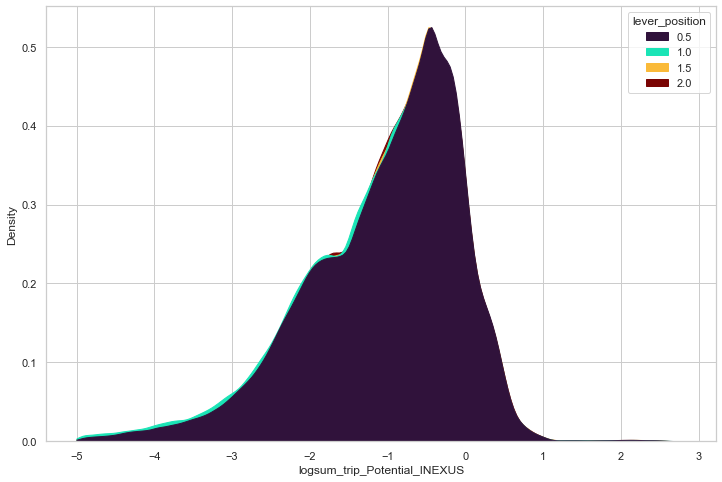

In [48]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8
sns.kdeplot(data=mand, x="logsum_trip_Potential_INEXUS", hue="lever_position", cut=0, fill=True, common_norm=False, alpha=1, palette = "turbo")
plt.show()

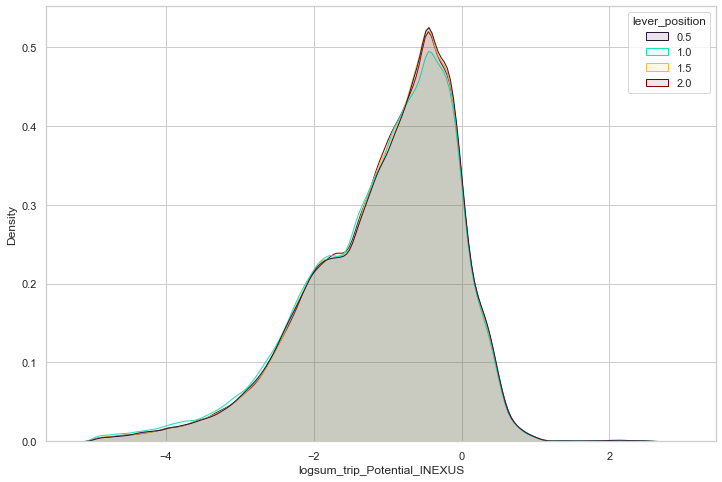

In [50]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8
# With transparency
sns.kdeplot(data=mand, x="logsum_trip_Potential_INEXUS", hue="lever_position", fill=True, common_norm=False, alpha=0.1, palette = "turbo")
plt.show()

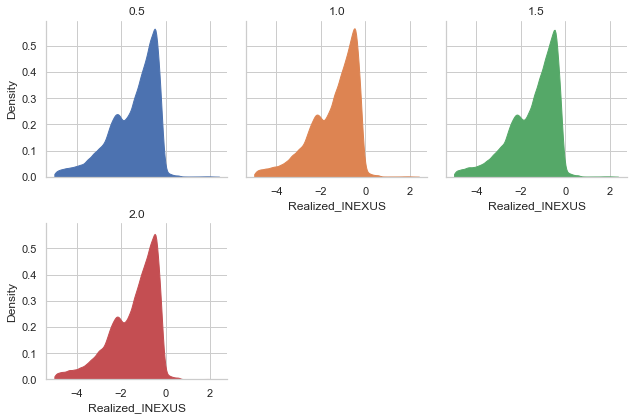

In [38]:
# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(mand, col='lever_position', hue='lever_position', col_wrap=3)

# draw density plots
g = g.map(sns.kdeplot,"Realized_INEXUS", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Realized_INEXUS', ylabel='Density'>

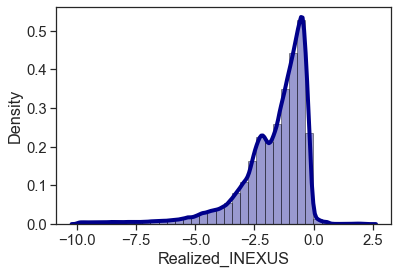

In [32]:
sns.distplot(mand['Realized_INEXUS'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

Text(0, 0.5, 'Density')

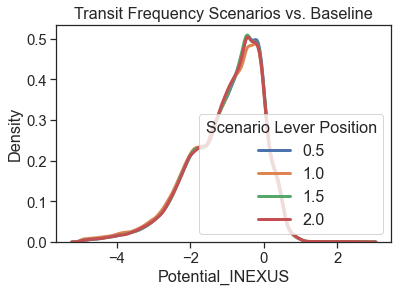

In [83]:
# List of five airlines to plot
scenarios = [0.5, 1.0, 1.5, 2.0]

# Iterate through the five airlines
for scenario in scenarios:
    # Subset to the airline
    subsets = mand[mand['lever_position'] == scenario]
    
    # Draw the density plot
    sns.distplot(subsets['logsum_trip_Potential_INEXUS'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = scenario)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Scenario Lever Position')
plt.title('Transit Frequency Scenarios vs. Baseline')
plt.xlabel('Potential_INEXUS')
plt.ylabel('Density')

In [89]:
# List of five airlines to plot
scenarios = [0.5, 1.0, 1.5, 2.0]

# Iterate through the five airlines
for scenario in scenarios:
    # Subset to the airline
    subsets = mand[mand['lever_position'] == scenario]
    
    # Draw the density plot
    sns.distplot(subsets['Realized_INEXUS'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = scenario)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Scenario')
plt.title('Transit Frequency Scenarios vs. Baseline')
plt.xlabel('Realized_INEXUS')
plt.ylabel('Density')

TypeError: distplot() got an unexpected keyword argument 'palette'

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logsum_trip_Potential_INEXUS', ylabel='Density'>

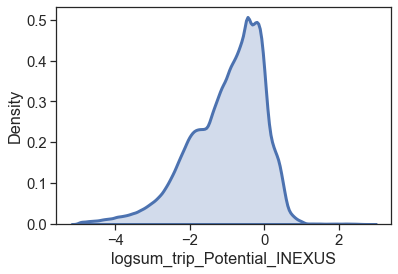

In [85]:
sns.distplot(mand['logsum_trip_Potential_INEXUS'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = scenario)

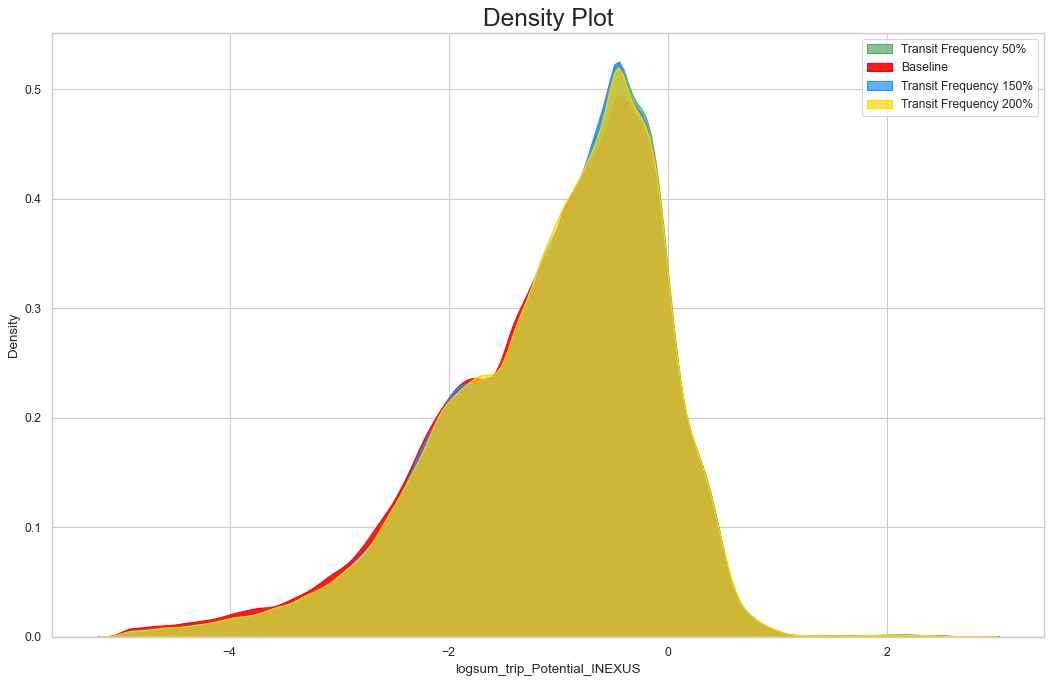

In [68]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 0.5, "logsum_trip_Potential_INEXUS"], shade=True, color="g", label="Transit Frequency 50%", alpha=.7)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "logsum_trip_Potential_INEXUS"], shade=True, color="red", label="Baseline", alpha=.9)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.5, "logsum_trip_Potential_INEXUS"], shade=True, color="dodgerblue", label="Transit Frequency 150%", alpha=.7)
sns.kdeplot(mand.loc[mand['lever_position'] == 2.0, "logsum_trip_Potential_INEXUS"], shade=True, color="gold", label="Transit Frequency 200%", alpha=.7)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

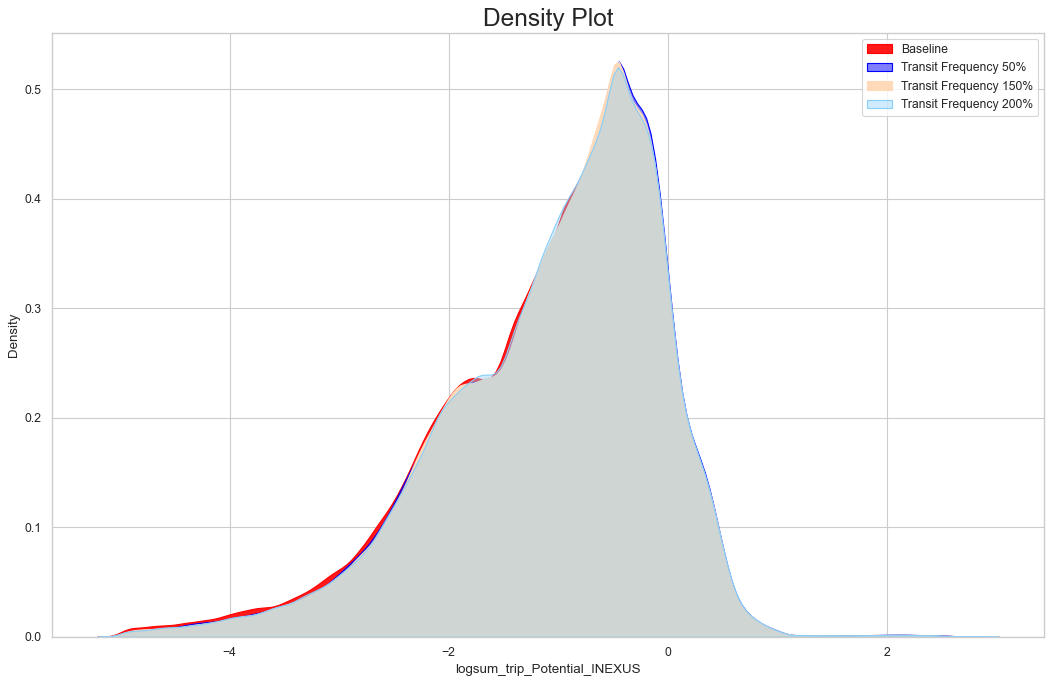

In [89]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "logsum_trip_Potential_INEXUS"], shade=True, color="red", label="Baseline", alpha=.9)
sns.kdeplot(mand.loc[mand['lever_position'] == 0.5, "logsum_trip_Potential_INEXUS"], shade=True, color="blue", label="Transit Frequency 50%", alpha=.5)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.5, "logsum_trip_Potential_INEXUS"], shade=True, color="peachpuff", label="Transit Frequency 150%", alpha=1)
sns.kdeplot(mand.loc[mand['lever_position'] == 2.0, "logsum_trip_Potential_INEXUS"], shade=True, color="lightskyblue", label="Transit Frequency 200%", alpha=.4)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

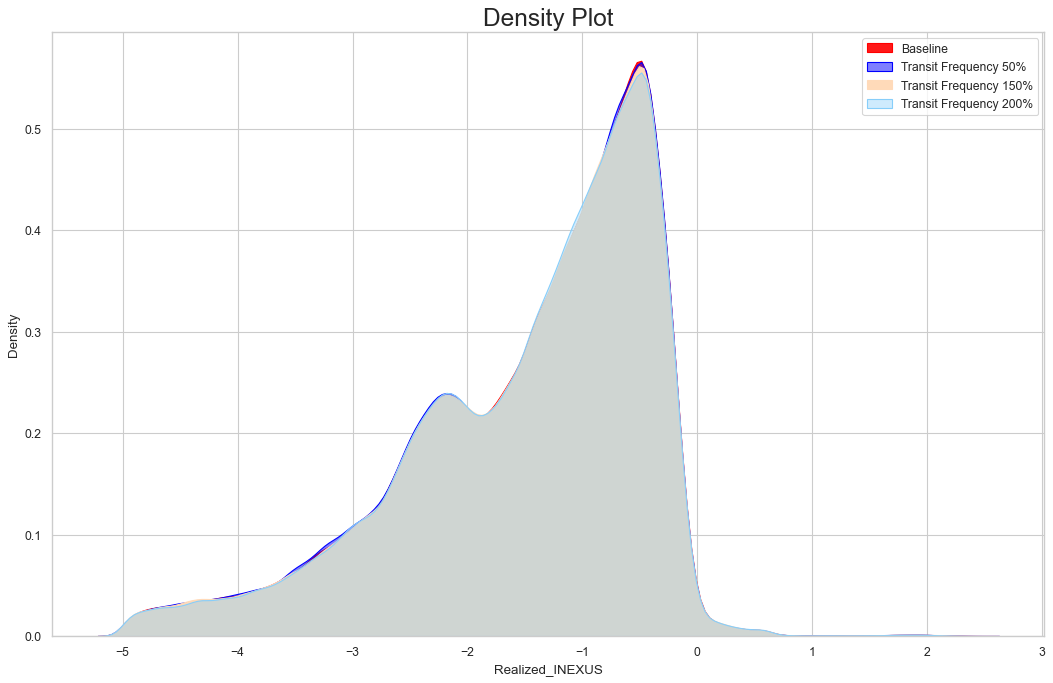

In [90]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "Realized_INEXUS"], shade=True, color="red", label="Baseline", alpha=.9)
sns.kdeplot(mand.loc[mand['lever_position'] == 0.5, "Realized_INEXUS"], shade=True, color="blue", label="Transit Frequency 50%", alpha=.5)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.5, "Realized_INEXUS"], shade=True, color="peachpuff", label="Transit Frequency 150%", alpha=1)
sns.kdeplot(mand.loc[mand['lever_position'] == 2.0, "Realized_INEXUS"], shade=True, color="lightskyblue", label="Transit Frequency 200%", alpha=.4)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

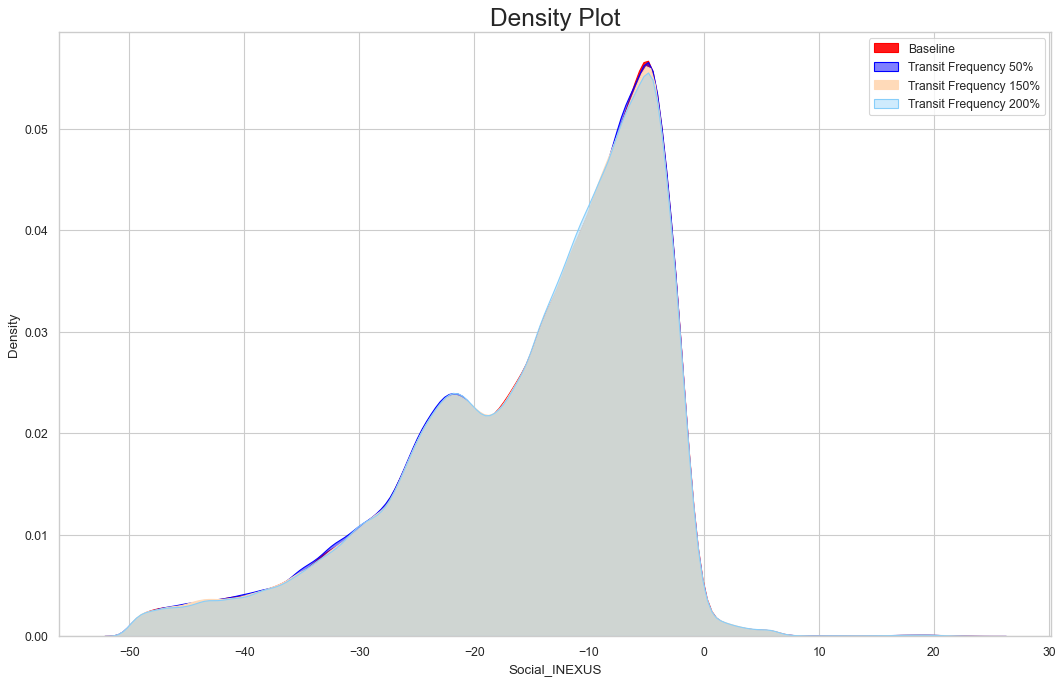

In [92]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "Social_INEXUS"], shade=True, color="red", label="Baseline", alpha=.9)
sns.kdeplot(mand.loc[mand['lever_position'] == 0.5, "Social_INEXUS"], shade=True, color="blue", label="Transit Frequency 50%", alpha=.5)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.5, "Social_INEXUS"], shade=True, color="peachpuff", label="Transit Frequency 150%", alpha=1)
sns.kdeplot(mand.loc[mand['lever_position'] == 2.0, "Social_INEXUS"], shade=True, color="lightskyblue", label="Transit Frequency 200%", alpha=.4)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

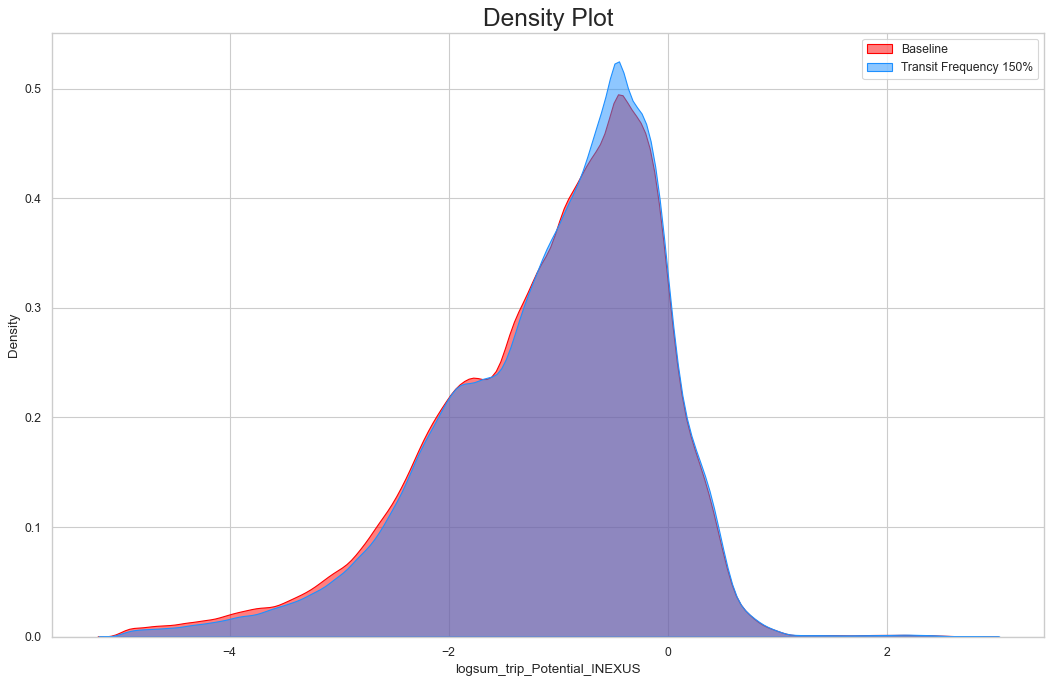

In [62]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "logsum_trip_Potential_INEXUS"], shade=True, color="red", label="Baseline", alpha=.5)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.5, "logsum_trip_Potential_INEXUS"], shade=True, color="dodgerblue", label="Transit Frequency 150%", alpha=.5)
# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

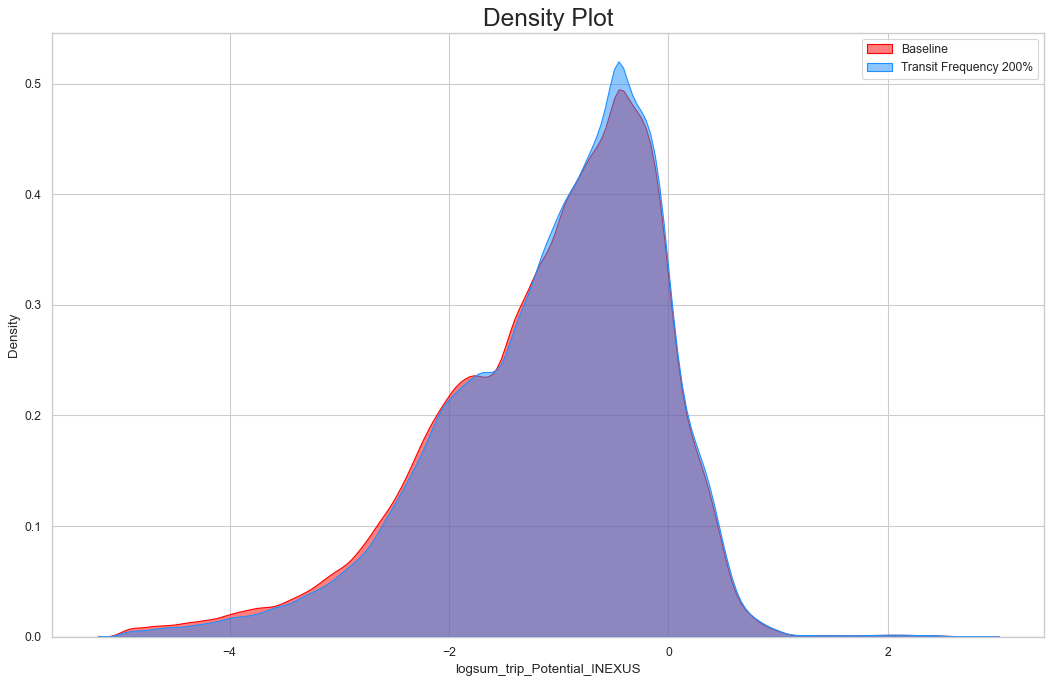

In [63]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "logsum_trip_Potential_INEXUS"], shade=True, color="red", label="Baseline", alpha=.5)
sns.kdeplot(mand.loc[mand['lever_position'] == 2.0, "logsum_trip_Potential_INEXUS"], shade=True, color="dodgerblue", label="Transit Frequency 200%", alpha=.5)
# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()